In [45]:
import os

base_dir = './datasets/goose_and_duck_small'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

In [46]:
from tensorflow import keras
from keras import models
from keras import layers
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights = 'imagenet',include_top=False, input_shape=(150,150,3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [47]:
conv_base.trainable = False


for _, layer in enumerate(conv_base.layers):
    print(layer.name, layer.trainable)

input_4 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [49]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.1,
                                  zoom_range=0.1,
                                  horizontal_flip=True,
                                  fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=16,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=16,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-5),
             metrics=['acc'])

history = model.fit(
train_generator,
epochs=30,
validation_data=validation_generator
)

Found 100 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


Epoch 1/30
7/7 [==============================] - 3s 195ms/step - loss: 0.6921 - acc: 0.5700 - val_loss: 0.6726 - val_acc: 0.5600
Epoch 2/30
7/7 [==============================] - 1s 90ms/step - loss: 0.6372 - acc: 0.6200 - val_loss: 0.6440 - val_acc: 0.6000
Epoch 3/30
7/7 [==============================] - 1s 94ms/step - loss: 0.5856 - acc: 0.7000 - val_loss: 0.6166 - val_acc: 0.6800
Epoch 4/30
7/7 [==============================] - 1s 103ms/step - loss: 0.5638 - acc: 0.7800 - val_loss: 0.5963 - val_acc: 0.6800
Epoch 5/30
7/7 [==============================] - 1s 104ms/step - loss: 0.5350 - acc: 0.8100 - val_loss: 0.5754 - val_acc: 0.7800
Epoch 6/30
7/7 [==============================] - 1s 89ms/step - loss: 0.4909 - acc: 0.8700 - val_loss: 0.5610 - val_acc: 0.7600
Epoch 7/30
7/7 [==============================] - 1s 90ms/step - loss: 0.4980 - acc: 0.8400 - val_loss: 0.5464 - val_acc: 0.7600
Epoch 8/30
7/7 [==============================] - 1s 94ms/step - loss: 0.4770 - acc: 0.8400 - 

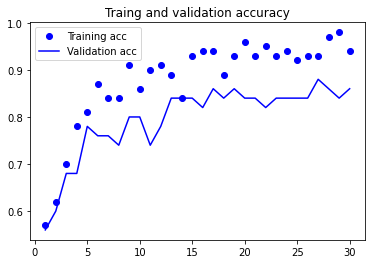

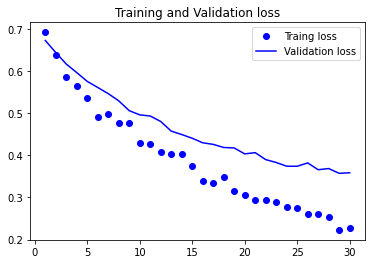

In [52]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Traing and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label = 'Traing loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [54]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable  = True
    else:
        layer.trainable = False

for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

0 input_4 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [55]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-5),
             metrics=['acc'])

history = model.fit(
train_generator,
epochs=100,
validation_data=validation_generator)

Epoch 1/100
7/7 [==============================] - 2s 130ms/step - loss: 0.2095 - acc: 0.9300 - val_loss: 0.2903 - val_acc: 0.8600
Epoch 2/100
7/7 [==============================] - 1s 97ms/step - loss: 0.1194 - acc: 0.9900 - val_loss: 0.2729 - val_acc: 0.8400
Epoch 3/100
7/7 [==============================] - 1s 97ms/step - loss: 0.0909 - acc: 0.9800 - val_loss: 0.2595 - val_acc: 0.8600
Epoch 4/100
7/7 [==============================] - 1s 96ms/step - loss: 0.0864 - acc: 0.9800 - val_loss: 0.3044 - val_acc: 0.9000
Epoch 5/100
7/7 [==============================] - 1s 92ms/step - loss: 0.0686 - acc: 1.0000 - val_loss: 0.2739 - val_acc: 0.8800
Epoch 6/100
7/7 [==============================] - 1s 96ms/step - loss: 0.0494 - acc: 0.9900 - val_loss: 0.2879 - val_acc: 0.9000
Epoch 7/100
7/7 [==============================] - 1s 106ms/step - loss: 0.0464 - acc: 1.0000 - val_loss: 0.2944 - val_acc: 0.8600
Epoch 8/100
7/7 [==============================] - 1s 93ms/step - loss: 0.0486 - acc: 0.

7/7 [==============================] - 1s 91ms/step - loss: 1.4484e-05 - acc: 1.0000 - val_loss: 0.4534 - val_acc: 0.9000
Epoch 63/100
7/7 [==============================] - 1s 115ms/step - loss: 9.8129e-06 - acc: 1.0000 - val_loss: 0.4537 - val_acc: 0.9000
Epoch 64/100
7/7 [==============================] - 1s 105ms/step - loss: 8.3163e-06 - acc: 1.0000 - val_loss: 0.4594 - val_acc: 0.8800
Epoch 65/100
7/7 [==============================] - 1s 101ms/step - loss: 4.8694e-05 - acc: 1.0000 - val_loss: 0.4614 - val_acc: 0.9000
Epoch 66/100
7/7 [==============================] - 1s 101ms/step - loss: 0.0092 - acc: 1.0000 - val_loss: 0.5431 - val_acc: 0.9000
Epoch 67/100
7/7 [==============================] - 1s 97ms/step - loss: 1.0109e-04 - acc: 1.0000 - val_loss: 0.4974 - val_acc: 0.8800
Epoch 68/100
7/7 [==============================] - 1s 104ms/step - loss: 1.8387e-04 - acc: 1.0000 - val_loss: 0.4433 - val_acc: 0.9000
Epoch 69/100
7/7 [==============================] - 1s 97ms/step - 

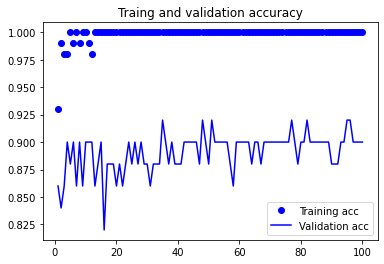

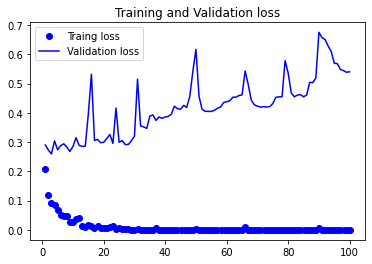

In [56]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Traing and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label = 'Traing loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [41]:
test_generator = test_datagen.flow_from_directory(
test_dir, target_size=(150,150),
# batch_size=20,
class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:',test_acc)


Found 50 images belonging to 2 classes.
50/50 [==============================] - 0s 2ms/step - loss: 0.4373 - acc: 0.9000
test acc: 0.8999999761581421
